In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
act_orders = pd.read_csv('Orders_actual.csv')
forecast_orders = pd.read_csv('Orders_forecast.csv')
recipes = pd.read_csv('recipes.csv')

menu_id = forecast_orders['menu_id'].values
recipe_id = forecast_orders['recipe_id'].values
value = forecast_orders['value'].values

rec_id = recipes['id'].values
title = recipes['title'].values
box_type = recipes['box_type_id'].values
collection_id = recipes['collection_id'].values
cuisine_id = recipes['cuisine_id'].values
protein_id = recipes['protein_id'].values

In [4]:
#plt.bar(recipe_id, value, align = 'center', alpha=0.5)
#plt.xticks(recipe_id, value)

act_orders1 = forecast_orders.drop('menu_id', 1)
recipes = recipes.drop(['title', 'box_type_id', 'collection_id'], axis= 1)

In [5]:
#frames = [act_orders1, recipes]
#frames1 = 

#print(act_orders1.groupby(['recipe_id']).sum())
forecast_final = act_orders1.groupby(['recipe_id']).sum()
recipes_final = recipes.groupby(['id']).sum()

#frames = forecast_final.append([recipes_final])
#print(recipes_final)
frames = pd.concat([forecast_final, recipes_final], axis=1)
full_final = frames.groupby(['cuisine_id','protein_id']).aggregate(np.sum).unstack()

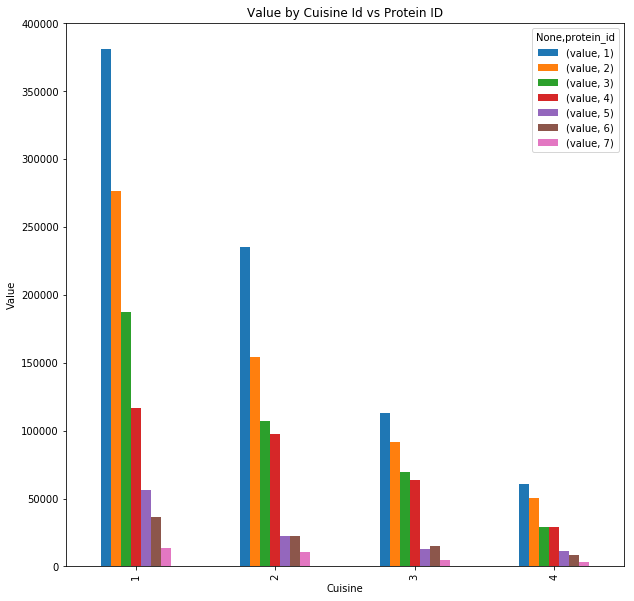

In [13]:
#coll_id = full_final['collection_id'].values
#final_values = full_final['value'].values

#plt.bar(coll_id, final_values, align = 'center', alpha=0.5)
#plt.xticks(coll_id, final_values)
full_final.plot(kind = 'bar', title = 'Value by Cuisine Id vs Protein ID')
#print(frames)
plt.ylabel('Value')
plt.xlabel('Cuisine')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.show()